In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
from scipy import stats
import pylab
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


In [2]:
#read data from the given dataset
data=pd.read_csv(r"D:\Denver_1704119.csv",parse_dates=[-1])
df=data.copy()
df.head()

,acct_doc_header_id,company_id,doc_number,doc_number_norm,business_code,create_year,document_line_number,document_type,cust_number,cust_number_norm,...,debit_credit_status,payment_method,document_create_date.1,invoice_currency,doc_id,actual_outstanding_amount,payment_amount,days_past_duedate,age_invoice,dispute_amount
0,542832919,60,45529534,45529534,enme9,NaN,NaN,RI,218996,218996,...,NaN,NaN,NaN,2520.00,542832919,2520.00,2520.00,7,82,NaT
1,539895096,60,39849333,39849333,mdtd4,NaN,NaN,RI,226552,226552,...,NaN,NaN,NaN,20187.58,539895096,20187.58,20187.58,1,61,NaT
2,538335509,60,38313301,38313301,enme9,NaN,NaN,RI,218996,218996,...,NaN,NaN,NaN,919.98,538335509,919.98,919.98,2,77,NaT
3,541416057,60,42338776,42338776,CZRP4,NaN,NaN,RI,228442,228442,...,NaN,NaN,NaN,1097.74,541416057,1097.74,1097.74,-3,57,NaT
4,541588672,60,42640823,42640823,enme9,NaN,NaN,RI,218996,218996,...,NaN,NaN,NaN,8946.18,541588672,8946.18,8946.18,4,79,NaT


In [3]:
print(df.dtypes)
df.shape#check the no of rows and colums

acct_doc_header_id                    int64
company_id                            int64
doc_number                            int64
doc_number_norm                       int64
business_code                        object
create_year                         float64
document_line_number                float64
document_type                        object
cust_number                           int64
cust_number_norm                      int64
customer_map_id                       int64
name_customer                        object
division                            float64
document_create_date                 object
document_create_date_norm            object
posting_date                        float64
posting_date_norm                   float64
posting_id                          float64
due_in_date                         float64
due_in_date_norm                    float64
order_create_date                   float64
order_date_norm                     float64
invoice_id                      

(50000, 47)

In [4]:
df=df.dropna(axis=1, how='all') #to drop columns with all NAN values
df.drop_duplicates('doc_number',keep='first',inplace=True)#to drop all the rows except the first payment made against the invoice 
df.shape

(46397, 29)

In [5]:
#deleting those colums where the value is same throughout the whole columns in every row.
nunique = df.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
df.drop(cols_to_drop, axis=1,inplace=True)  
df.shape

(46397, 26)

In [6]:
new_dict = {k: i for i, k in enumerate(df.business_code.unique(), 0)}
df.loc[:, 'business_code_mapped'] = df.loc[:, 'business_code'].map(new_dict)    #category wise/categorical mapping of business code

In [7]:
df.head()

,acct_doc_header_id,doc_number,doc_number_norm,business_code,cust_number,cust_number_norm,name_customer,document_create_date,document_create_date_norm,invoice_id,...,clear_date,clear_date_norm,is_open_invoice,invoice_currency,doc_id,actual_outstanding_amount,payment_amount,days_past_duedate,age_invoice,business_code_mapped
0,542832919,45529534,45529534,enme9,218996,218996,end frame,2019-01-21,2019-01-21,45529534,...,2019-04-13,2019-04-13,0,2520.00,542832919,2520.00,2520.00,7,82,0
1,539895096,39849333,39849333,mdtd4,226552,226552,mdassist pvt ltd,2018-07-23,2018-07-23,39849333,...,2018-09-22,2018-09-22,0,20187.58,539895096,20187.58,20187.58,1,61,1
2,538335509,38313301,38313301,enme9,218996,218996,end frame,2018-05-18,2018-05-18,38313301,...,2018-08-03,2018-08-03,0,919.98,538335509,919.98,919.98,2,77,0
3,541416057,42338776,42338776,CZRP4,228442,228442,CZERKA CORP,2018-10-19,2018-10-19,42338776,...,2018-12-15,2018-12-15,0,1097.74,541416057,1097.74,1097.74,-3,57,2
4,541588672,42640823,42640823,enme9,218996,218996,end frame,2018-10-29,2018-10-29,42640823,...,2019-01-16,2019-01-16,0,8946.18,541588672,8946.18,8946.18,4,79,0


In [8]:
df = df.sort_values(['clear_date_norm'], ascending = (True))#sort the given data in terms of clear date

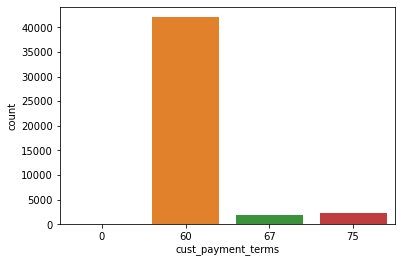

In [9]:
sns.countplot(x='cust_payment_terms',data=df)       #counting the values in cust_payment_terms

In [10]:
df.drop(['cust_payment_terms'],axis=1,inplace=True)   #deleting cust_payment_term as it has more than 90% of data similar.

In [11]:
df.shape

(46397, 26)

In [12]:
# Creating correlation matrix
corr_matrix = df.corr().abs()

In [13]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [14]:
to_drop = [column for column in upper.columns if any(upper[column] ==1)]
print(to_drop)

['doc_number_norm', 'cust_number_norm', 'invoice_id', 'invoice_id_norm', 'total_open_amount_norm', 'doc_id', 'actual_outstanding_amount']


In [15]:
#droping the correlated/duplicate colums
df=df.drop(columns=['doc_number_norm','cust_number_norm','invoice_id_norm','total_open_amount_norm','doc_id','document_create_date_norm','clear_date_norm'])
df.head()

,acct_doc_header_id,doc_number,business_code,cust_number,name_customer,document_create_date,invoice_id,baseline_create_date,invoice_date_norm,total_open_amount,shipping_date,clear_date,is_open_invoice,invoice_currency,actual_outstanding_amount,payment_amount,days_past_duedate,age_invoice,business_code_mapped
40196,531520333,28347387,skes8,228098,skynetpwc softwares,2017-05-01,28347387,2017-05-01,2017-05-01,0.0,05/01/2017,2017-06-10,0,1998.80,1998.80,180.55,110,170,20
38306,531533090,28364248,holi10,218995,hooli,2017-05-02,28364248,2017-05-02,2017-05-02,0.0,05/02/2017,2017-06-15,0,17582.86,17582.86,17582.86,88,148,35
34428,531533086,28364219,holi10,218995,hooli,2017-05-02,28364219,2017-05-02,2017-05-02,0.0,05/02/2017,2017-06-15,0,13168.57,13168.57,13168.57,88,148,35
8976,531517996,28332803,holi10,218995,hooli,2017-05-01,28332803,2017-05-01,2017-05-01,0.0,05/01/2017,2017-06-15,0,2568.83,2568.83,2568.83,89,149,35
29734,531533082,28364165,holi10,218995,hooli,2017-05-02,28364165,2017-05-02,2017-05-02,0.0,05/02/2017,2017-06-15,0,4443.26,4443.26,4443.26,88,148,35


In [16]:

df.info()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46397 entries, 40196 to 48798
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   acct_doc_header_id         46397 non-null  int64  
 1   doc_number                 46397 non-null  int64  
 2   business_code              46397 non-null  object 
 3   cust_number                46397 non-null  int64  
 4   name_customer              46397 non-null  object 
 5   document_create_date       46397 non-null  object 
 6   invoice_id                 46397 non-null  int64  
 7   baseline_create_date       9776 non-null   object 
 8   invoice_date_norm          9776 non-null   object 
 9   total_open_amount          46397 non-null  float64
 10  shipping_date              9776 non-null   object 
 11  clear_date                 41397 non-null  object 
 12  is_open_invoice            46397 non-null  int64  
 13  invoice_currency           46397 non-null 

Calculating the mean,median,mode,variance and standard deviation of actual outstanding amount.

In [17]:
d_sum=df['actual_outstanding_amount'].sum()

In [18]:
d_count=df['actual_outstanding_amount'].count()

In [19]:
d_mean=d_sum/d_count
print("Mean actual_oustanding_amount is:", d_mean)

Mean actual_oustanding_amount is: 8539.91074573787


In [20]:
df_pd= df.sort_values(['actual_outstanding_amount'])
d_count

46397

In [21]:
import statistics
print("Median of data-set is : % s "
        % (statistics.median(df_pd.actual_outstanding_amount)))

Median of data-set is : 5024.66 


In [22]:
df_mode = df_pd.actual_outstanding_amount.value_counts().index[0]
print("The most common actual outstanding amount is, as indicated by its mode, is:", df_mode)

The most common actual outstanding amount is, as indicated by its mode, is: 459.99


In [23]:
df_pd['actual_outstanding_amount_dev'] = (df_pd['actual_outstanding_amount'] - d_mean) ** 2
d_variance = df_pd.actual_outstanding_amount_dev.sum() / (d_count - 1)
print("Variance is:", d_variance)

Variance is: 304966460.87633675


In [24]:
d_SD = np.sqrt(d_variance)
print("Standard Deviation is:", d_SD)

Standard Deviation is: 17463.28894785678


In [25]:
df_pd.describe()

,acct_doc_header_id,doc_number,cust_number,invoice_id,total_open_amount,is_open_invoice,invoice_currency,actual_outstanding_amount,payment_amount,days_past_duedate,age_invoice,business_code_mapped,actual_outstanding_amount_dev
count,4.639700e+04,4.639700e+04,46397.000000,4.639700e+04,46397.000000,46397.000000,4.639700e+04,4.639700e+04,4.639700e+04,46397.000000,46397.000000,46397.000000,4.639700e+04
mean,5.387213e+08,3.899861e+07,223534.684398,3.899861e+07,890.499372,0.083497,8.539911e+03,8.539911e+03,7.385753e+03,8.332586,69.401125,12.308813,3.049599e+08
std,4.224339e+06,6.755627e+06,4443.115524,6.755627e+06,5534.757000,0.276635,1.746329e+04,1.746329e+04,1.656593e+04,35.001317,34.958528,9.922833,2.230812e+10
min,5.315170e+08,2.832870e+07,218994.000000,2.832870e+07,0.000000,0.000000,1.420000e+00,1.420000e+00,0.000000e+00,-69.000000,4.000000,0.000000,7.966323e-03
25%,5.353374e+08,3.290410e+07,218997.000000,3.290410e+07,0.000000,0.000000,1.699170e+03,1.699170e+03,8.630100e+02,-2.000000,59.000000,5.000000,1.073965e+07
50%,5.386262e+08,3.863673e+07,226546.000000,3.863673e+07,0.000000,0.000000,5.024660e+03,5.024660e+03,3.878070e+03,2.000000,62.000000,10.000000,3.683775e+07
75%,5.424193e+08,4.447530e+07,228098.000000,4.447530e+07,0.000000,0.000000,1.122364e+04,1.122364e+04,9.854090e+03,6.000000,68.000000,20.000000,6.165690e+07
max,5.459100e+08,5.153547e+07,229624.000000,5.153547e+07,589327.200000,1.000000,2.166982e+06,2.166982e+06,2.166982e+06,558.000000,618.000000,50.000000,4.658871e+12


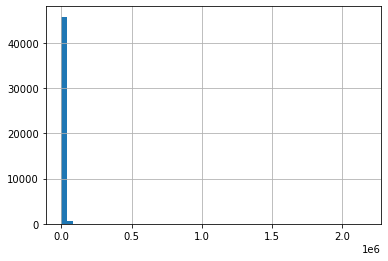

In [26]:
fig=df.actual_outstanding_amount.hist(bins=50)

Calculating the mean,median,mode,variance and standard deviation of payment amount

In [27]:
pa_sum=df['payment_amount'].sum()
pa_count=df['payment_amount'].count()
pa_mean=pa_sum/pa_count
print("Mean of payement amount is",pa_mean)

Mean of payement amount is 7385.753059896113


In [28]:
df_pa= df.sort_values(['payment_amount'])
pa_count

46397

In [29]:
print("Median of data-set is : % s "
        % (statistics.median(df_pa.payment_amount)))

Median of data-set is : 3878.07 


In [30]:
pa_mode = df_pa.payment_amount.value_counts().index[0]
print("The most payment amount is, as indicated by its mode, is:", pa_mode)

The most payment amount is, as indicated by its mode, is: 0.0


In [31]:
df_pa['payment_amount_dev'] = (df_pa['payment_amount'] - pa_mean) ** 2
pa_variance = df_pa.payment_amount_dev.sum() / (pa_count - 1)
print("Variance is:", pa_variance)

Variance is: 274429969.68171036


In [32]:
pa_SD = np.sqrt(pa_variance)
print("Standard Deviation is:", pa_SD)

Standard Deviation is: 16565.92797526629


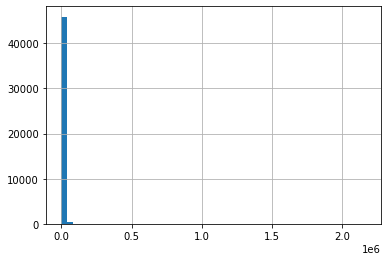

In [33]:
fig=df.payment_amount.hist(bins=50)

In [34]:
df_pa.describe()

,acct_doc_header_id,doc_number,cust_number,invoice_id,total_open_amount,is_open_invoice,invoice_currency,actual_outstanding_amount,payment_amount,days_past_duedate,age_invoice,business_code_mapped,payment_amount_dev
count,4.639700e+04,4.639700e+04,46397.000000,4.639700e+04,46397.000000,46397.000000,4.639700e+04,4.639700e+04,4.639700e+04,46397.000000,46397.000000,46397.000000,4.639700e+04
mean,5.387213e+08,3.899861e+07,223534.684398,3.899861e+07,890.499372,0.083497,8.539911e+03,8.539911e+03,7.385753e+03,8.332586,69.401125,12.308813,2.744241e+08
std,4.224339e+06,6.755627e+06,4443.115524,6.755627e+06,5534.757000,0.276635,1.746329e+04,1.746329e+04,1.656593e+04,35.001317,34.958528,9.922833,2.216347e+10
min,5.315170e+08,2.832870e+07,218994.000000,2.832870e+07,0.000000,0.000000,1.420000e+00,1.420000e+00,0.000000e+00,-69.000000,4.000000,0.000000,5.881971e-01
25%,5.353374e+08,3.290410e+07,218997.000000,3.290410e+07,0.000000,0.000000,1.699170e+03,1.699170e+03,8.630100e+02,-2.000000,59.000000,5.000000,1.034995e+07
50%,5.386262e+08,3.863673e+07,226546.000000,3.863673e+07,0.000000,0.000000,5.024660e+03,5.024660e+03,3.878070e+03,2.000000,62.000000,10.000000,3.417306e+07
75%,5.424193e+08,4.447530e+07,228098.000000,4.447530e+07,0.000000,0.000000,1.122364e+04,1.122364e+04,9.854090e+03,6.000000,68.000000,20.000000,5.454935e+07
max,5.459100e+08,5.153547e+07,229624.000000,5.153547e+07,589327.200000,1.000000,2.166982e+06,2.166982e+06,2.166982e+06,558.000000,618.000000,50.000000,4.663855e+12


In [35]:
#change the datatype of clear date to datetime
df['clear_date'] = pd.to_datetime(df.clear_date)

In [36]:
#mapping the customer name and age invoice column using mean of age invoice so that it can be used a feature 
mapper=df.groupby('name_customer')['age_invoice'].agg('mean')
df['age_invoice_avg']=df['name_customer'].map(mapper)

In [37]:
#mapping the business code and age outstanding amount using mean of outstanding amount to be paid so that it can be used a feature 
mapper=df.groupby('business_code')['actual_outstanding_amount'].agg('mean')
df['actual_outstanding_amount_avg']=df['business_code'].map(mapper)

In [38]:
#mapping the customer name and days past due date mentioned in invoice using mean of days after due date  so that it can be used a feature 
mapper=df.groupby('name_customer')['days_past_duedate'].agg('mean')
df['days_past_duedate_avg']=df['name_customer'].map(mapper)

Transforming invoice currency so that the distribution is better than normal distribution

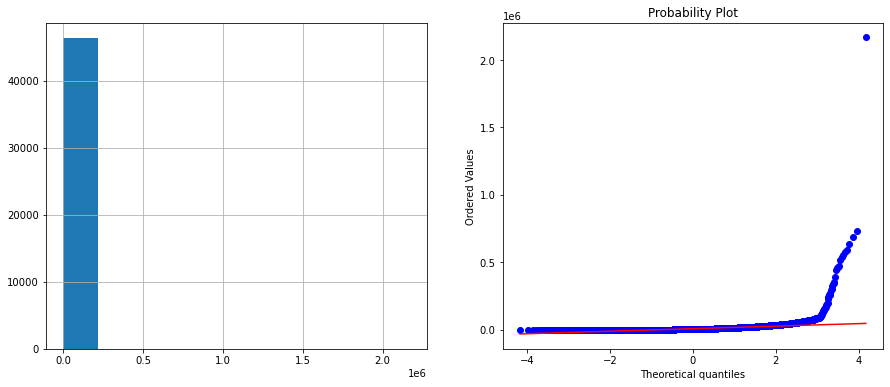

In [39]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)

    plt.show()
    
diagnostic_plots(df, 'invoice_currency')

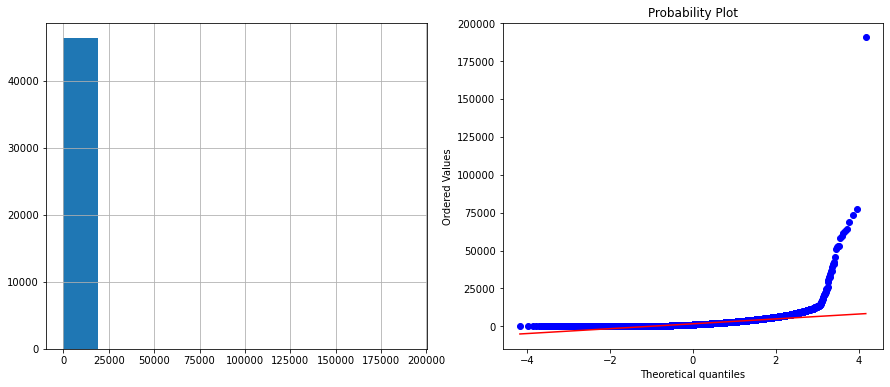

In [40]:
df['N_invoice_currency'] = data.invoice_currency**(1/1.2) 

diagnostic_plots(df, 'N_invoice_currency')

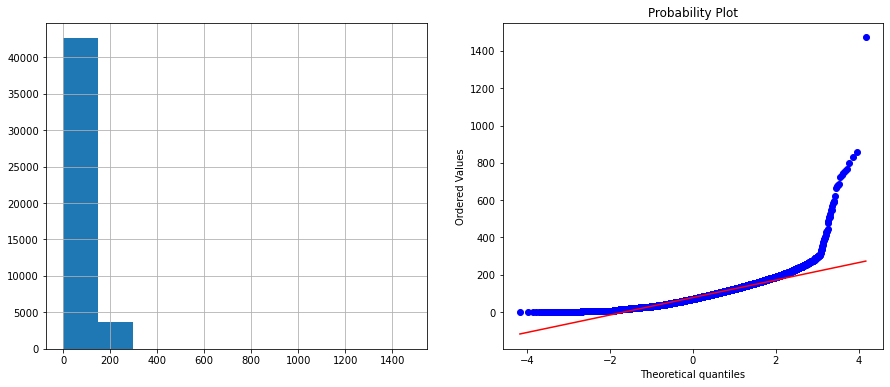

In [41]:
df['N_invoice_currency'] =df.invoice_currency**(1/2)

diagnostic_plots(df, 'N_invoice_currency')

Optimal λ:  0.2156702116017453


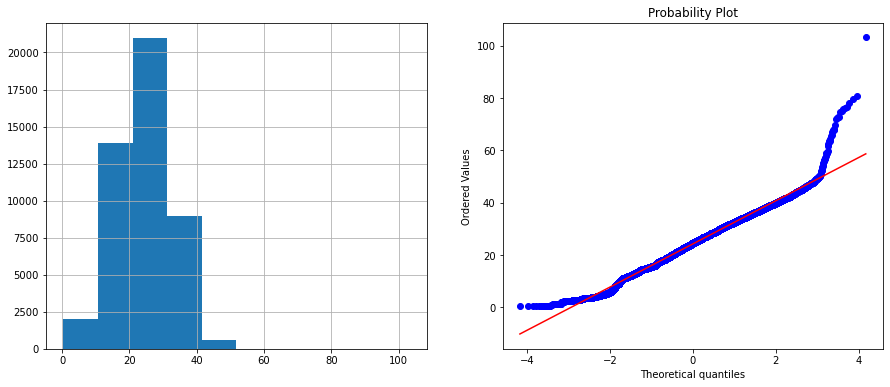

In [42]:
df['N_invoice_currency'], param = stats.boxcox(df.invoice_currency) 

print('Optimal λ: ', param)

diagnostic_plots(df, 'N_invoice_currency')
#Hence box cox gives the best transformation

In [43]:
df.head()

,acct_doc_header_id,doc_number,business_code,cust_number,name_customer,document_create_date,invoice_id,baseline_create_date,invoice_date_norm,total_open_amount,...,invoice_currency,actual_outstanding_amount,payment_amount,days_past_duedate,age_invoice,business_code_mapped,age_invoice_avg,actual_outstanding_amount_avg,days_past_duedate_avg,N_invoice_currency
40196,531520333,28347387,skes8,228098,skynetpwc softwares,2017-05-01,28347387,2017-05-01,2017-05-01,0.0,...,1998.80,1998.80,180.55,110,170,20,63.020588,4956.737980,3.020588,19.246213
38306,531533090,28364248,holi10,218995,hooli,2017-05-02,28364248,2017-05-02,2017-05-02,0.0,...,17582.86,17582.86,17582.86,88,148,35,75.318792,9135.160906,15.318792,33.535667
34428,531533086,28364219,holi10,218995,hooli,2017-05-02,28364219,2017-05-02,2017-05-02,0.0,...,13168.57,13168.57,13168.57,88,148,35,75.318792,9135.160906,15.318792,31.228354
8976,531517996,28332803,holi10,218995,hooli,2017-05-01,28332803,2017-05-01,2017-05-01,0.0,...,2568.83,2568.83,2568.83,89,149,35,75.318792,9135.160906,15.318792,20.574181
29734,531533082,28364165,holi10,218995,hooli,2017-05-02,28364165,2017-05-02,2017-05-02,0.0,...,4443.26,4443.26,4443.26,88,148,35,75.318792,9135.160906,15.318792,23.736630


In [44]:
df.shape

(46397, 23)

In [45]:

df.dtypes

acct_doc_header_id                        int64
doc_number                                int64
business_code                            object
cust_number                               int64
name_customer                            object
document_create_date                     object
invoice_id                                int64
baseline_create_date                     object
invoice_date_norm                        object
total_open_amount                       float64
shipping_date                            object
clear_date                       datetime64[ns]
is_open_invoice                           int64
invoice_currency                        float64
actual_outstanding_amount               float64
payment_amount                          float64
days_past_duedate                         int64
age_invoice                               int64
business_code_mapped                      int64
age_invoice_avg                         float64
actual_outstanding_amount_avg           

In [46]:
#including only numerics and datetime labels in the dataframe
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','datetime']
numerical_vars = list(df.select_dtypes(include=numerics).columns)
df= df[numerical_vars]

In [47]:
df.dtypes

acct_doc_header_id                        int64
doc_number                                int64
cust_number                               int64
invoice_id                                int64
total_open_amount                       float64
clear_date                       datetime64[ns]
is_open_invoice                           int64
invoice_currency                        float64
actual_outstanding_amount               float64
payment_amount                          float64
days_past_duedate                         int64
age_invoice                               int64
business_code_mapped                      int64
age_invoice_avg                         float64
actual_outstanding_amount_avg           float64
days_past_duedate_avg                   float64
N_invoice_currency                      float64
dtype: object

In [48]:
#Splitting of train and test with the condition that train will have data where clear date is not null and test will have data where clear date is null 
X_test=df.loc[df.clear_date.isnull()].copy()
X_train=df.loc[df.clear_date.notnull()].copy()
X_train.shape,X_test.shape

((41397, 17), (5000, 17))

In [49]:
#excluding datetime label from train and test set
X_train=X_train.select_dtypes(exclude=['datetime'])
X_test=X_test.select_dtypes(exclude=['datetime'])

In [50]:
#mapping the customer name and invoice currency using mean of invoice currency  so that it can be used a feature 
mapper=X_train.groupby('cust_number')['invoice_currency'].agg('mean')
X_train['invoice_avg']=X_train['cust_number'].map(mapper)
X_test['invoice_avg']=X_test['cust_number'].map(mapper)

In [51]:
#Validation set
val_train,val_test, y_train, y_test = train_test_split(
    X_train.drop(labels=['payment_amount'], axis=1),
    X_train['payment_amount'],
    test_size=0.3,
    random_state=42)
print(val_train)

       acct_doc_header_id  doc_number  cust_number  invoice_id  \
2274            532714300    30058103       219001    30058103   
24727           537291227    36553383       228104    36553383   
1473            542256937    44073800       218996    44073800   
29319           533814499    31470216       218997    31470216   
4256            538842095    38812158       226550    38812158   
...                   ...         ...          ...         ...   
28456           533609265    31220404       218996    31220404   
29208           535473615    33167175       218996    33167175   
25362           543971484    48056042       228453    48056042   
27586           531598327    28489899       228084    28489899   
34117           536788203    35777708       219001    35777708   

       total_open_amount  is_open_invoice  invoice_currency  \
2274                 0.0                0           1748.37   
24727                0.0                0          23772.92   
1473              

In [52]:
#dropping columns which would play no role in prediction 
val_train.drop(['acct_doc_header_id','doc_number','cust_number','invoice_id','invoice_currency','actual_outstanding_amount'], axis=1, inplace=True)

In [53]:
#dropping columns which would play no role in prediction 
val_test.drop(['acct_doc_header_id','doc_number','cust_number','invoice_id','invoice_currency','actual_outstanding_amount'], axis=1, inplace=True)

In [54]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(val_train)  # fit finds the features with zero variance i.e same values throughout the column 

VarianceThreshold(threshold=0)

In [55]:
sum(sel.get_support())

8

In [56]:
len(val_train.columns[sel.get_support()])


8

In [57]:
print(
    len([
        x for x in val_train.columns
        if x not in val_train.columns[sel.get_support()]
    ]))

[x for x in val_train.columns if x not in val_train.columns[sel.get_support()]]

2


['total_open_amount', 'is_open_invoice']

In [58]:
#dropping those columns with no variance 
val_train = sel.transform(val_train)
val_test = sel.transform(val_test)

val_train.shape, val_test.shape

((28977, 8), (12420, 8))

In [59]:
y_train

2274      1748.37
24727    23772.92
1473     26873.19
29319     1809.73
4256       598.10
           ...   
28456     7617.45
29208    44311.79
25362     9089.91
27586    30036.15
34117       65.78
Name: payment_amount, Length: 28977, dtype: float64

In [60]:
val_train

array([[ 3.70000000e+01,  9.70000000e+01,  5.00000000e+00, ...,
         7.74011407e+00,  1.85665644e+01,  7.21493867e+03],
       [ 3.00000000e+00,  6.30000000e+01,  3.10000000e+01, ...,
        -7.75784753e-01,  3.61013639e+01,  1.40160671e+04],
       [ 1.10000000e+01,  8.60000000e+01,  0.00000000e+00, ...,
         7.20297556e+00,  3.71927310e+01,  1.08584221e+04],
       ...,
       [-1.50000000e+01,  4.50000000e+01,  2.60000000e+01, ...,
        -1.18709677e+01,  2.84728365e+01,  1.31625610e+04],
       [ 1.17000000e+02,  1.77000000e+02,  1.90000000e+01, ...,
         1.65177994e+01,  3.82087029e+01,  1.60753803e+04],
       [-3.00000000e+00,  5.70000000e+01,  5.00000000e+00, ...,
         7.74011407e+00,  6.80045970e+00,  7.21493867e+03]])

In [62]:
#linear regession 
from sklearn.linear_model import LinearRegression
reg = LinearRegression(normalize=True)
reg.fit(val_train, y_train)
print(val_train)

[[ 3.70000000e+01  9.70000000e+01  5.00000000e+00 ...  7.74011407e+00
   1.85665644e+01  7.21493867e+03]
 [ 3.00000000e+00  6.30000000e+01  3.10000000e+01 ... -7.75784753e-01
   3.61013639e+01  1.40160671e+04]
 [ 1.10000000e+01  8.60000000e+01  0.00000000e+00 ...  7.20297556e+00
   3.71927310e+01  1.08584221e+04]
 ...
 [-1.50000000e+01  4.50000000e+01  2.60000000e+01 ... -1.18709677e+01
   2.84728365e+01  1.31625610e+04]
 [ 1.17000000e+02  1.77000000e+02  1.90000000e+01 ...  1.65177994e+01
   3.82087029e+01  1.60753803e+04]
 [-3.00000000e+00  5.70000000e+01  5.00000000e+00 ...  7.74011407e+00
   6.80045970e+00  7.21493867e+03]]


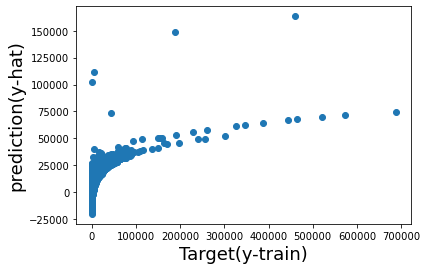

In [63]:
y_hat=reg.predict(val_train)
plt.scatter(y_train,y_hat)
plt.xlabel('Target(y-train)',size=18)
plt.ylabel('prediction(y-hat)',size=18)
plt.show()

Text(0.5, 1.0, 'residuals')

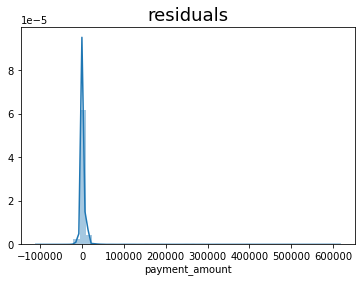

In [64]:
sns.distplot(y_train-y_hat)
plt.title('residuals',size=18)

In [65]:
accuracy=reg.score(val_train, y_train)*100
print(accuracy)

47.60221188991599


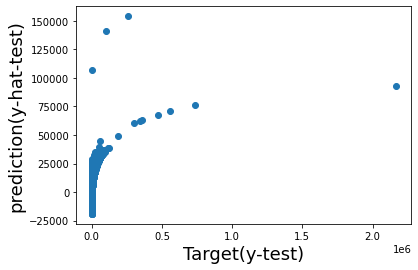

In [66]:
y_hat_test=reg.predict(val_test)
plt.scatter(y_test,y_hat_test)
plt.xlabel('Target(y-test)',size=18)
plt.ylabel('prediction(y-hat-test)',size=18)
plt.show()

In [67]:
df_pf=pd.DataFrame(y_hat_test,columns=['predictions'])
df_pf.head()

,predictions
0,5676.343656
1,-928.280510
2,-2800.972314
3,15099.555005
4,17404.956087


In [68]:
y_test=y_test.reset_index(drop='True')
y_test.head()

0     3265.01
1     1450.00
2      672.00
3     4221.92
4    13689.15
Name: payment_amount, dtype: float64

In [69]:
df_pf['target']=y_test
df_pf.head()

,predictions,target
0,5676.343656,3265.01
1,-928.280510,1450.00
2,-2800.972314,672.00
3,15099.555005,4221.92
4,17404.956087,13689.15


In [70]:
#checking the mean absolute error of our model
#model should not have way too good(close to zero) which implies there is a leakage 
from sklearn.metrics import mean_absolute_error
y_true = df_pf['target']
y_pred = df_pf['predictions']
mean_absolute_error(y_true, y_pred)

4085.6938886964026

In [71]:
import pickle
filename='1704119.pkl'
pickle.dump(reg,open(filename,"wb"));